In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [3]:
from pathlib import Path
import sys
import yaml
sys.path.append("../../")

In [4]:
from pytorch_toolbox.pipeline import PipelineGraph
from src.train_with_template import lookups

In [5]:
CONFIG_FILE = Path("../configs/resnet34_d_template.yml")

In [6]:
with CONFIG_FILE.open("r") as f:
    config = yaml.load(f)

In [7]:
pipeline_graph = PipelineGraph.create_pipeline_graph_from_config(config)

In [8]:
pipeline_graph.sorted_node_names

['LoadTrainingData',
 'CreateDataSplitter',
 'LoadTestingData',
 'CreateDenormalizeFunction',
 'CreateNormalizeFunction',
 'CreateTestAugmentationFunction',
 'CreateAugmentationFunction',
 'CreateOpenImageFunction',
 'CreateTestingDataset',
 'CreateValidationDataset',
 'CreateTrainingDataset',
 'CreateFocalLoss',
 'CreateF1SoftMetric',
 'CreateAccuracyMetric',
 'CreateModel',
 'CreateGradientClippingLearnerCallback',
 'CreateNameExtractionCallback',
 'CreateCallbacks',
 'CreateTimeStampedSavePath',
 'CreateOutputRecorderLearnerCallback',
 'CreateCSVLoggerLearnerCallback',
 'CreateLearnerCallbacks',
 'CreateLearner',
 'SaveConfiguration',
 'CreateResultRecorder',
 'RunRecordResults',
 'CreateTrainingScheme',
 'CreateSamplerFunction',
 'CreateSampler',
 'CreateDataBunch',
 'RunTrainingLoop']

In [9]:
pipeline_graph.run(lookups, to_node="CreateDataBunch")

In [10]:
create_data_splitter = pipeline_graph.get_node("CreateDataSplitter")
create_data_bunch = pipeline_graph.get_node("CreateDataBunch")
create_learner = pipeline_graph.get_node("CreateLearner")

In [11]:
train_idx, val_idx = next(iter(create_data_splitter['output_lookup']['DataSplitter']()))

In [12]:
data_bunch = create_data_bunch['output_lookup']['DataBunch'](train_idx, val_idx)

In [13]:
data_bunch

DataBunch;
Train: <src.data.ProteinClassificationDataset object at 0x7fef7ce82198>;
Valid: <src.data.ProteinClassificationDataset object at 0x7fef7ce82c88>;
Test: <src.data.ProteinClassificationDataset object at 0x7fef7ce825f8>

In [14]:
learner = create_learner['output_lookup']['LearnerCreator'](data_bunch)

In [15]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


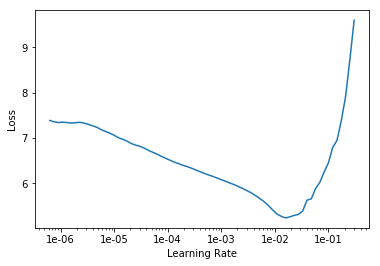

In [16]:
learner.recorder.plot()